In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from os.path import expanduser
import seaborn as sns
from cmcrameri import cm
from matplotlib import colors
import matplotlib.patches as patches

In [2]:
DETECTS_3DID_NAME = 'minvi-600-2021-12-19-02-35-34'
DETECTS_3DID_DIR = '/media/big-ssd/results-P3856_YHE211-3did/{}/P3856_YHE211/features-3did'.format(DETECTS_3DID_NAME)
DETECTS_3DID_FILE = '{}/exp-P3856_YHE211-run-P3856_YHE211_1_Slot1-1_1_5104-features-3did-dedup.feather'.format(DETECTS_3DID_DIR)

In [3]:
# load the 3DID features classified as identifiable
detects_3did_df = pd.read_feather(DETECTS_3DID_FILE)

In [4]:
detects_3did_df.sample(n=4)

,index,mono_mz_lower,mono_mz_upper,scan_apex,scan_lower,scan_upper,inverse_k0_apex,rt_apex,rt_lower,rt_upper,...,voxel_id,voxel_metadata_d,scan_df,scan_r_squared,rt_df,rt_r_squared,number_of_frames,feature_id,prediction,identification_predicted
94779,1252,846.949829,847.003784,398.0,374.0,422.0,1.115928,2044.204346,2039.442993,2049.204346,...,750007462,"{""mz_lower"": 847.4, ""mz_upper"": 847.5, ""scan_l...","[{""scan"":360,""inverse_k0"":1.1352194548,""intens...",0.994851,"[{""frame_id"":18262,""retention_time_secs"":2036....",0.977876,19,312838,0.752914,True
154830,301,1214.910156,1214.987549,311.0,287.0,322.0,1.160069,1783.294189,1778.294189,1788.294189,...,1120002408,"{""mz_lower"": 1215.2, ""mz_upper"": 1215.3, ""scan...","[{""scan"":271,""inverse_k0"":1.1803327799,""intens...",0.955846,"[{""frame_id"":15852,""retention_time_secs"":1781....",0.933476,8,492789,0.715181,True
69659,750,741.285889,741.333069,110.0,95.0,136.0,1.261699,955.906067,954.330200,960.110107,...,650003107,"{""mz_lower"": 741.3, ""mz_upper"": 741.4, ""scan_l...","[{""scan"":68,""inverse_k0"":1.2828739882,""intensi...",0.979108,"[{""frame_id"":8740,""retention_time_secs"":945.92...",0.759387,12,237059,0.945379,True
47667,2777,689.305420,689.349304,209.0,199.0,239.0,1.211703,518.367981,514.692017,519.944702,...,590009322,"{""mz_lower"": 689.3000000000001, ""mz_upper"": 68...","[{""scan"":169,""inverse_k0"":1.2319179773,""intens...",0.977105,"[{""frame_id"":4550,""retention_time_secs"":505.76...",0.949766,11,164244,0.400739,True


In [5]:
detects_3did_df.loc[detects_3did_df.scan_apex.idxmax()][['scan_apex','inverse_k0_apex']]

scan_apex             916.0
inverse_k0_apex    0.851201
Name: 1, dtype: object

In [6]:
detects_3did_df.loc[detects_3did_df.scan_apex.idxmin()][['scan_apex','inverse_k0_apex']]

scan_apex              49.0
inverse_k0_apex    1.292446
Name: 86728, dtype: object

In [7]:
(1.292446-0.851201)/(916-49)*20

0.010178662053056517

In [8]:
detects_3did_df.columns

Index(['index', 'mono_mz_lower', 'mono_mz_upper', 'scan_apex', 'scan_lower',
       'scan_upper', 'inverse_k0_apex', 'rt_apex', 'rt_lower', 'rt_upper',
       'intensity_without_saturation_correction',
       'intensity_with_saturation_correction',
       'mono_intensity_adjustment_outcome', 'isotopic_peaks', 'isotope_count',
       'envelope', 'coelution_coefficient', 'mobility_coefficient',
       'voxels_processed', 'monoisotopic_mz', 'charge', 'neutral_mass',
       'monoisotopic_mass', 'feature_intensity', 'deconvolution_envelope',
       'deconvolution_score', 'feature_region_3d_extent', 'voxel_id',
       'voxel_metadata_d', 'scan_df', 'scan_r_squared', 'rt_df',
       'rt_r_squared', 'number_of_frames', 'feature_id', 'prediction',
       'identification_predicted'],
      dtype='object')

In [81]:
biosaur_name = 'P3856_YHE211_1_Slot1-1_1_5104-denoised-biosaur-mini-200-ac-10-minl-3.features.tsv'

DETECTS_BIOSAUR_FILE = '{}/{}'.format(expanduser('~'), biosaur_name)

In [82]:
detects_biosaur_df = pd.read_csv(DETECTS_BIOSAUR_FILE, sep='\\t', engine='python')

In [83]:
detects_biosaur_df = detects_biosaur_df[(detects_biosaur_df.nIsotopes >= 3)]

In [84]:
detects_biosaur_df.loc[detects_biosaur_df.ion_mobility.idxmax()].ion_mobility

1.2853787977064846

In [85]:
detects_biosaur_df.columns

Index(['massCalib', 'rtApex', 'intensityApex', 'charge', 'nIsotopes', 'nScans',
       'sulfur', 'cos_corr_1', 'cos_corr_2', 'diff_for_output',
       'corr_fill_zero', 'intensity_1', 'scan_id_1', 'mz_std_1', 'intensity_2',
       'scan_id_2', 'mz_std_2', 'mz', 'rtStart', 'rtEnd', 'id', 'ion_mobility',
       'FAIMS', 'targeted_mode'],
      dtype='object')

In [86]:
# corresponds to about the same scan tolerance as 20 scans over 910
DUP_INVERSE_K0 = (detects_3did_df.inverse_k0_apex.max()-detects_3did_df.inverse_k0_apex.min())*(20/910) * 4
DUP_INVERSE_K0 = 0.05

In [87]:
# definition of a duplicate feature
DUP_MZ_TOLERANCE_PPM = 25
DUP_RT_TOLERANCE = 5

In [88]:
# set up dup definitions
MZ_TOLERANCE_PERCENT = DUP_MZ_TOLERANCE_PPM * 10**-4
detects_biosaur_df['dup_mz_ppm_tolerance'] = detects_biosaur_df.mz * MZ_TOLERANCE_PERCENT / 100
detects_biosaur_df['dup_mz_lower'] = detects_biosaur_df.mz - detects_biosaur_df.dup_mz_ppm_tolerance
detects_biosaur_df['dup_mz_upper'] = detects_biosaur_df.mz + detects_biosaur_df.dup_mz_ppm_tolerance
detects_biosaur_df['dup_inverse_k0_lower'] = detects_biosaur_df.ion_mobility - DUP_INVERSE_K0
detects_biosaur_df['dup_inverse_k0_upper'] = detects_biosaur_df.ion_mobility + DUP_INVERSE_K0
detects_biosaur_df['dup_rt_lower'] = detects_biosaur_df.rtApex - DUP_RT_TOLERANCE
detects_biosaur_df['dup_rt_upper'] = detects_biosaur_df.rtApex + DUP_RT_TOLERANCE

In [89]:
# find the features detected by 3DID and Biosaur
matched_features_3did = set()
matched_features_biosaur = set()

for row in detects_3did_df.itertuples():
    df = detects_biosaur_df[(row.charge == detects_biosaur_df.charge) & (row.monoisotopic_mz >= detects_biosaur_df.dup_mz_lower) & (row.monoisotopic_mz <= detects_biosaur_df.dup_mz_upper) & (row.inverse_k0_apex >= detects_biosaur_df.dup_inverse_k0_lower) & (row.inverse_k0_apex <= detects_biosaur_df.dup_inverse_k0_upper) & (row.rt_apex >= detects_biosaur_df.dup_rt_lower) & (row.rt_apex <= detects_biosaur_df.dup_rt_upper)]
    if len(df) > 0:
        matched_features_3did.update(set([row.feature_id]))
        matched_features_biosaur.update(set(df.id.tolist()))

In [90]:
contained_in_3did_not_biosaur = len(detects_3did_df) - len(matched_features_3did)
contained_in_biosaur_not_3did = len(detects_biosaur_df) - len(matched_features_biosaur)
contained_in_both = len(matched_features_biosaur)

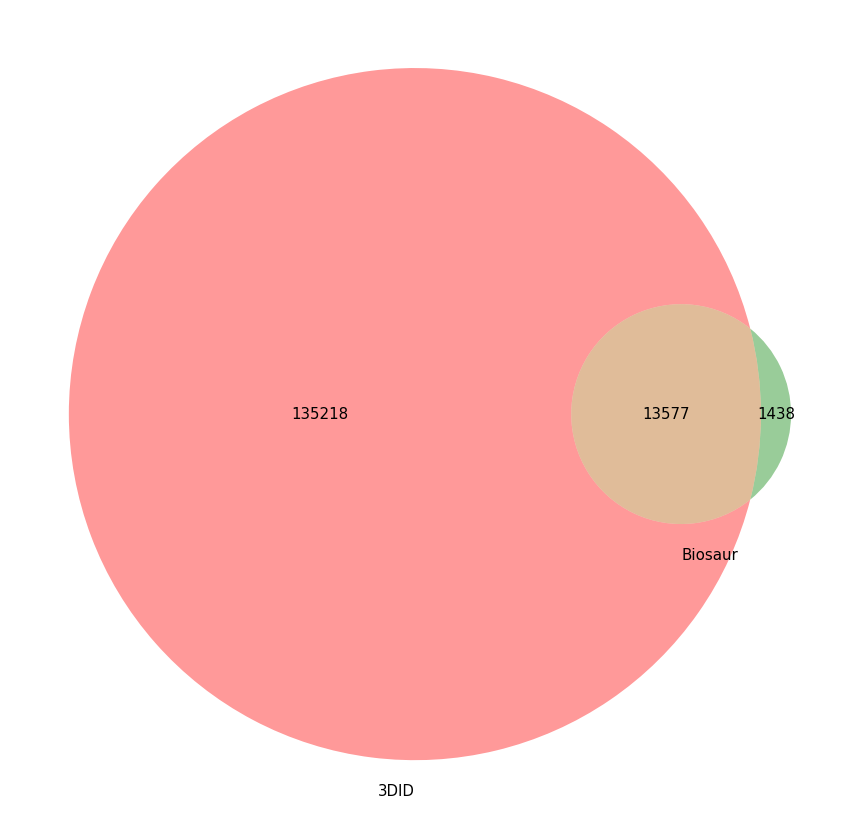

In [91]:
f, ax = plt.subplots()
f.set_figheight(15)
f.set_figwidth(20)

plt.margins(0.06)

v = venn2(subsets = (contained_in_3did_not_biosaur, contained_in_biosaur_not_3did, contained_in_both), set_labels = ('3DID', 'Biosaur'))
for text in v.subset_labels:
    text.set_fontsize(15)
for text in v.set_labels:
    text.set_fontsize(15)

plt.show()

In [92]:
matched_3did_df = detects_3did_df[detects_3did_df.feature_id.isin(matched_features_3did)]

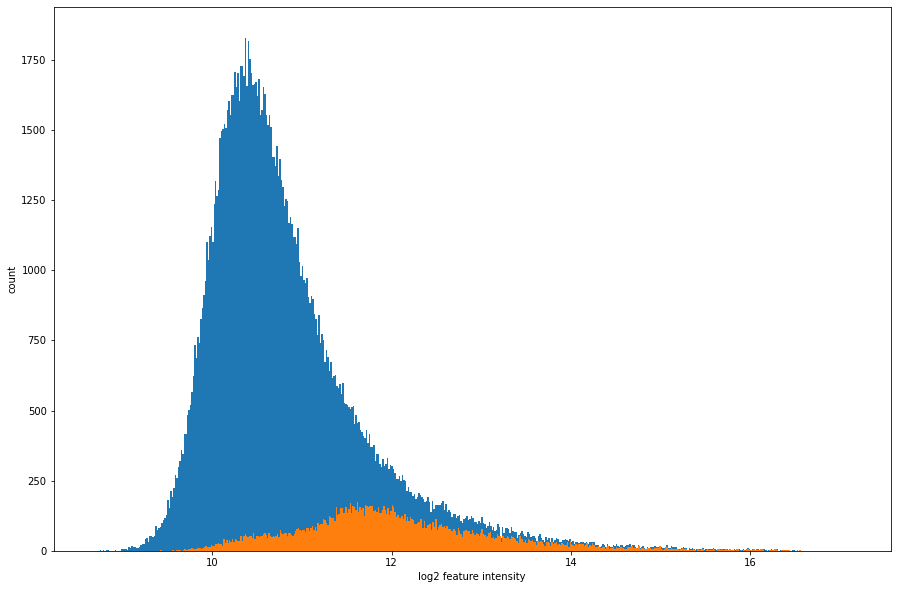

In [93]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(15)

plt.margins(0.06)

bins = 500
values = np.log2(detects_3did_df.feature_intensity)
y, x, _ = ax.hist(values, bins=bins, label='detected')

values = np.log2(matched_3did_df.feature_intensity)
y, x, _ = ax.hist(values, bins=bins, label='matched')

ax.set_xlabel('log2 feature intensity')
ax.set_ylabel('count')

plt.show()

In [94]:
biosaur_only_df = detects_biosaur_df[~detects_biosaur_df.id.isin(matched_features_biosaur)]

In [95]:
biosaur_only_df.sample(n=5)

,massCalib,rtApex,intensityApex,charge,nIsotopes,nScans,sulfur,cos_corr_1,cos_corr_2,diff_for_output,...,ion_mobility,FAIMS,targeted_mode,dup_mz_ppm_tolerance,dup_mz_lower,dup_mz_upper,dup_inverse_k0_lower,dup_inverse_k0_upper,dup_rt_lower,dup_rt_upper
13823,3931.763070,1801.294778,1618.0,5,3,5,0,0.937589,1.0,-7.833508e-07,...,1.018869,0,[],0.019684,787.340206,787.379574,0.968869,1.068869,1796.294778,1806.294778
14401,571.330303,829.841148,1655.0,1,3,4,0,0.831436,1.0,-1.779199e-06,...,1.134783,0,[],0.014308,572.323272,572.351888,1.084783,1.184783,824.841148,834.841148
15299,409.213045,2407.577568,74441.0,1,3,21,0,0.999923,1.0,9.678385e-06,...,1.013662,0,[],0.010256,410.210066,410.230577,0.963662,1.063662,2402.577568,2412.577568
14485,601.315620,834.566410,730.0,1,3,4,0,0.686577,1.0,2.684136e-08,...,1.150437,0,[],0.015058,602.307839,602.337955,1.100437,1.200437,829.566410,839.566410
13422,2866.413986,1754.711587,1688.0,5,3,8,0,0.956532,1.0,-9.652562e-07,...,0.903076,0,[],0.014357,574.275716,574.304431,0.853076,0.953076,1749.711587,1759.711587


In [96]:
biosaur_only_df.mz.max()

1661.4332582544544

In [97]:
detects_3did_df.charge.min()

1

In [98]:
matched_biosaur_df = detects_biosaur_df[detects_biosaur_df.id.isin(matched_features_biosaur)]

In [99]:
matched_biosaur_df.intensityApex.mean()

22458.023790233485

In [100]:
biosaur_only_df.intensityApex.max()

660029.0